# Exemple d'application de la `SVD` pour compresser une image

### 1 - Import de l'image

Nous utilisons la Python Imaging Library (`PIL`) pour ouvrir l'image d'origine

In [14]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('classic')
# chargement en mémoire
imgpil = Image.open('tux.jpg')
# img.show() pour ouvrir l'image dans un logiciel externe
imgpil.size

(1038, 1250)

Visualisons l'image avec `matplotlib`

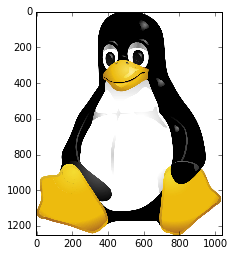

In [2]:
plt.imshow(imgpil)
plt.show()

Afin de pouvoir utiliser la SVD, nous avons besoin de convertir l'image en tableau `numpy`

In [3]:
img = np.array(imgpil) 
img.shape

(1250, 1038, 3)

L'affichage des dimensions de l'object donne:

* la hauteur
* la largeur
* les 3 dimensions de couleurs RVB

Il est par exemple possible d'appliquer un filtre qui détecte les traits

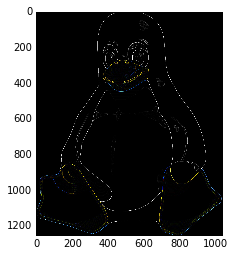

In [4]:
from PIL import ImageFilter
edges = imgpil.filter(ImageFilter.FIND_EDGES)
plt.imshow(edges)
plt.show()

Convertissons maintenant l'image en nuances de gris pour travailler sur une matrice 2D

In [5]:
imggray = imgpil.convert('LA')

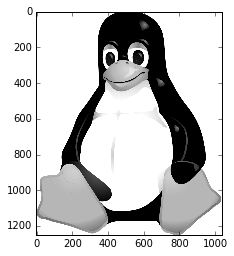

In [6]:
# visualisation avec matplotlib
plt.imshow(imggray)
plt.show()

Il est nécessaire de transformer en numpy-array, mais en ne gardant cette fois-ci que 2 dimensions pour avoir une matrice plus simple :

In [6]:
graymat = np.array( list(imggray.getdata(band = 0)), float)
graymat.shape = (imggray.size[1], imggray.size[0])
graymat = np.matrix(graymat)
graymat.shape

(1250, 1038)

### 2 - Décomposition en valeurs singulières

![title](svd.png)

Nous allons décomposer la matrice `graymat` (A dans la formule ci-dessus) en 3 autres :

* la matrice U, matrice orthogonale dont les colonnes sont appelées "left singular values" 
* la matrice D, matrice dont la diagonale contient les valeurs singulières
* la matrice V, matrice orthogonale dont les colonnes sont appelées "right singular values"

Cette décomposition se fait à l'aide de la bibliothèque d'algèbre linéaire incluse dans `numpy`

In [7]:
U, D, V = np.linalg.svd(graymat)

Les dimensions de chaque matrice sont les suivantes :

In [8]:
U.shape

(1250, 1250)

In [9]:
D.shape

(1038,)

In [10]:
V.shape

(1038, 1038)

Dans ce cas nous avons donc 1038 valeurs singulières pour l'image complète.

Reconstutions l'image en commençant avec __5 valeurs singulières__ selon la formule plus haut:

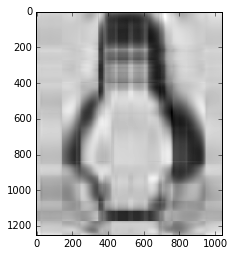

In [11]:
i = 5
cmpimg = np.matrix(U[:, :i]) * np.diag(D[:i]) * np.matrix(V[:i,:])
plt.imshow(cmpimg, cmap = 'gray')

L'image est très floue, et pour cause : elle ne "contient" que 5/1038, soit moins de 0.5% de l'information contenue dans l'image originale.

Regardons ce que cela donne avec __10 valeurs singulières__ :

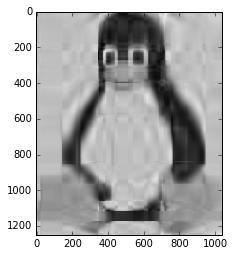

In [12]:
i = 10
cmpimg = np.matrix(U[:, :i]) * np.diag(D[:i]) * np.matrix(V[:i,:])
plt.imshow(cmpimg, cmap = 'gray')

Et pour finir, __50 valeurs singulières__, soit environ 5% de l'information

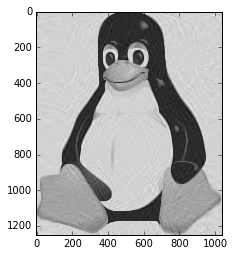

In [13]:
i = 50
cmpimg = np.matrix(U[:, :i]) * np.diag(D[:i]) * np.matrix(V[:i,:])
plt.imshow(cmpimg, cmap = 'gray')

__Conclusion :__

Nous parvenons à reconstituer l'image avec près de 20 fois moins d'information que l'image originale, ce qui illustre très bien une méthode simple de compression d'image.